<div style="font-family:Trebuchet MS;text-align:center;">
<h1> Numerical Methods of Approximation for Ordinary Differential Equations </h1>

<h3 style="color:#1a9988;"> Michael Humkey, Paul Taylor, Denis Andrusik, Jian Lan </h3>

</div>


<div style="font-family:Trebuchet MS;text-align:center;">
<h2> The Problem </h2>

<p style="color:#7a88a0;"> For many equations, it may be difficult to integrate, some are even impossible to integrate by normal means. So how can we model, if roughly the behavior of the solution? In many applications where solutions are needed, a numerical approximation can be made use of to similar effect as the symbolic solution. Numerical approximations though inexact can be made use of on any ordinary differential equation.
	Some such methods include Euler’s method, Runge-Kutta methods and other Linear Multistep Methods.
    
<strong style="font-family:georgia;"> y’ = y+t, y(0) = 1 </strong></p>

</div>




<div style="font-family:Trebuchet MS;text-align:center;">
<h2> Why should we care? </h2>

</div>


<div style="font-family:Trebuchet MS;text-align:center;">
<h3 style="color:#7a88a0;">Approximate answers for graphs and comparative data sets</h3>
<img style="display:block; margin:auto" src="https://s-media-cache-ak0.pinimg.com/736x/15/ae/2c/15ae2ce9b77fc7a357706854f15ed928--pie-graph-funny-graphs.jpg" height="512" width="506">
</div>

<div style="font-family:Trebuchet MS;text-align:center;">
<h3 style="color:#7a88a0;">Easily used to graphically represent data in computers</h3>
<img style="display:block; margin:auto" src="https://d2r4pw5uddxm3r.cloudfront.net/content/uploads/imported/uploads/2015/04/dhmis4_clever_0.png" height="512" width="750">
</div>

<div style="font-family:Trebuchet MS;text-align:center;">
<h3 style="color:#7a88a0;">Approximations are sufficient in many engineering applications</h3>
<img style="display:block; margin:auto" src="https://s-media-cache-ak0.pinimg.com/736x/af/36/76/af367636eccff8cf3cd280fa429f9b12--computer-repair-stupid-funny.jpg" height="512" width="384">
</div>

<div style="font-family:Trebuchet MS;text-align:center;">
<h3 style="color:#7a88a0;">Series expansions</h3>
<img style="display:block; margin:auto" src="http://www.thelandofshadow.com/wp-content/uploads/2015/08/91Wsiu9a3JL._SL1500_.jpg" height="512" width="753">
Please explain to me how a book 300 pages long got all this
</div>

<div style="font-family:Trebuchet MS;text-align:center;">
<h2> Modeling The Problem </h2>

<ul style="color:#7a88a0;text-align:left;"> 
    <li>
        <h3>Initial Value Problems:</h3>
        <ul style="color:#1a9988;">
            <li>
                An initial value problem is an ordinary differential equation together with some initial value, or initial condition.
            </li>
            <li>
                Example: dy/dx= 10 - x ,   y(0) = 0 
            </li>
        </ul>
    </li>
    <li>
        <h3>Ordinary Differential Equations:</h3>
        <ul style="color:#1a9988;">
            <li>
                ODE is an equation involving an unknown function and  its derivatives
            </li>
            <li>
                Example : 
 dy/dx= x,  a function y(x) whose derivative is x.
 dy/dx= y,  a function y(x) whose derivative is itself.
 yy’ + x = 0
 
            </li>
        </ul>
    </li>
</ul>

</div>

<div style="font-family:Trebuchet MS;text-align:center;">
<h2> Issues and Limitations</h2>

<ul style="color:#7a88a0;text-align:left;"> 
    <li>
        <h3>Error:</h3>
        <ul style="color:#1a9988;">
            <li>
                Euler’s Method is only good for approximating nice solutions that don’t change rapidly.
            </li>
            <li>
                Example:
                <img src="ex_lim.png">
            </li>
            <li>
                <img src="sol_lim.png">
            </li>
        </ul>
    </li>
</ul>

</div>

<div style="font-family:Trebuchet MS;text-align:center;">
<h2> Solving the Problem </h2>

<ul style="color:#7a88a0;text-align:left;"> 
    <li>
        <h3>Euler's Method:</h3>
        <ul style="color:#1a9988;">
            <li>
                This method allows us to approximate solutions to differential equations by using the below formula and by incrementing the time we can approximate how the solution is behaving at that time and then are able to predict how it behaves by plotting it. 
                <img src="http://tutorial.math.lamar.edu/Classes/DE/EulersMethod_files/eq0013MP.gif">

            </li>
        </ul>
    </li>
    <li>
        <h3>Midpoint Method:</h3>
        <ul style="color:#1a9988;">
            <li>
                This is similar to Euler’s method but improves the Euler method by adding a midpoint in the
step which increases the accuracy 
                <img src="http://tutorial.math.lamar.edu/Classes/CalcII/ApproximatingDefIntegrals_files/eq0011MP.gif">

            </li>
        </ul>
    </li>
    <li>
        <h3>Runge-Kutta Method:</h3>
        <ul style="color:#1a9988;">
            <li>
                This method is by far the most accurate and is a sort-of blend of the above two, though much more complex. 
                <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/44d56b38e104bfdf185d1307337e5c6e074b16c9">

            </li>
        </ul>
    </li>
</ul>

</div>

<div style="font-family:Trebuchet MS;text-align:center;">
<h2> Demo </h2>

</div>


We'll be using matplotlib to display our results. Let's start by importing pyplot.
We'll also import numpy here for convenient number handling later.

In [1]:
import matplotlib.pyplot as plt
# patches will just be used for the legend on a graph
import matplotlib.patches as mpatches
import numpy

Next we'll write functions to handle all of the above methods.

In [2]:
# graphwin: the window to plot on
# func: the function to model
# y: y initial
# t t initial
# h: step size
# n: number of points desired
#
# Uses Euler's method to approximate a function and plot it
def euler(func, y, t, h, n):
    t = numpy.linspace(t, n * h, num=n)
    y = len(t)*[y]
    for i in range (0, n-1):
        y[i+1]=(y[i] + h * func(t[i], y[i]))
    return {'t': t, 'y': y}

In [3]:
# graphwin: the window to plot on
# func: the function to model
# y: y initial
# t t initial
# h: step size
# n: number of points desired
#
# Uses the midpoint method to approximate a function and plot it
def midmethod(func, y, t, h, n):
    t = numpy.linspace(t, n * h, num=n)
    y = len(t)*[y]
    for i in range (0, n-1):
        fn = func(t[i], y[i])
        y[i+1]=(y[i] + h * float(func(t[i] + h/2, y[i] + (h/2)*fn)))
    return {'t': t, 'y': y}

In [4]:
# graphwin: the window to plot on
# func: the function to model
# y: y initial
# t t initial
# h: step size
# n: number of points desired
#
# Uses the Runge-Kutta method to approximate a function and plot it
def rk4(func, y, t, h, n):
    t = numpy.linspace(t, n * h, num=n)
    y = len(t)*[y]
    for i in range (0, n-1):
        y[i+1]=(y[i] + h * t4(func, t[i], y[i], h))
    return {'t': t, 'y': y}

# Produces the term t4 for the above calculation
def t4(func, t, y, h):
    k1 = func(t, y)
    k2 = func(t + h/2, y + (h/2) * k1)
    k3 = func(t + h/2, y + (h/2) * k2)
    k4 = func(t + h, y + h * k3)
    return 1/float(6) * (k1 + 2 * (k2 + k3) + k4)
        

Next we need a function to model and its solution.

In [5]:
# models the function y+t 
def somefunction(t, y):
    return (y + t) 

def solution(t, h, n):
    t = numpy.linspace(t, n * h, num=n)
    y = 2 * numpy.exp(t) - t - 1
    return {'t' : t, 'y' : y}

and a way to measure the time

In [6]:
from timeit import default_timer as time

finally we can produce the graphs and time each function

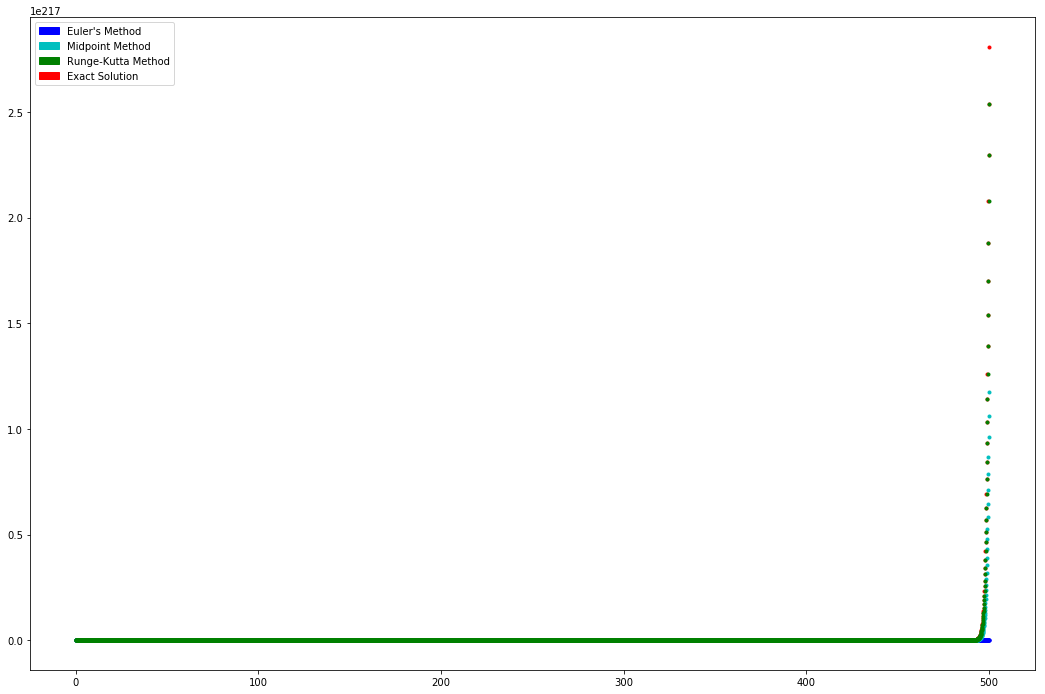

In [7]:
def callall(func, y=1, t=0, h=0.1, n=500):
    trials = 50
    
    timer = 0
    for i in range (0, trials):
        t1 = time()
        p1 = euler(func, y, t, h, n)
        timer += time() - t1
    t1 = timer / float(trials)
    
    timer = 0
    for i in range (0, trials):
        t2 = time()
        p2 = midmethod(func, y, t, h, n) 
        timer += time() - t2
    t2 = timer / float(trials)
    
    timer = 0
    for i in range (0, trials):
        t3 = time()
        p3 = rk4(func, y, t, h, n)
        timer += time() - t3
    t3 = timer / float(trials)
    
    p4 = solution(t, h, n)
    return p1, p2, p3, p4, [t1 * 1000, t2 * 1000, t3 * 1000]

p1, p2, p3, p4, t = callall(somefunction, h=0.1, n=5000)

plt.figure(figsize=(18, 12))
plt.plot(p4['t'], p4['y'], 'r.'),
plt.plot(p1['t'], p1['y'], 'b.'),
plt.plot(p2['t'], p2['y'], 'c.'),
plt.plot(p3['t'], p3['y'], 'g.')

blue = mpatches.Patch(color='b', label="Euler's Method")
cyan = mpatches.Patch(color='c', label="Midpoint Method")
green = mpatches.Patch(color='g', label="Runge-Kutta Method")
red = mpatches.Patch(color='r', label="Exact Solution")
plt.legend(handles=[blue, cyan, green, red])

plt.show()

Now let's examine our error versus compute time.

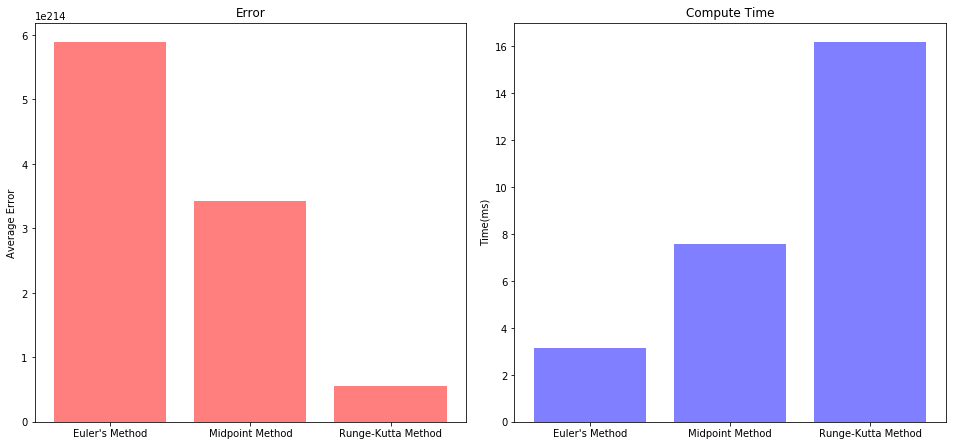

In [8]:
def error(expected, actual):
    return abs((sum(expected)/float(len(expected))) - (sum(actual)/float(len(actual))))

models = ("Euler's Method", "Midpoint Method", "Runge-Kutta Method")
y_pos = numpy.arange(len(models))
err = [error(p4['y'], p1['y']), error(p4['y'], p2['y']), error(p4['y'], p3['y'])]
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.bar(y_pos, err, align='center', alpha=0.5, color='r')
plt.xticks(y_pos, models)
plt.ylabel('Average Error')
plt.title('Error')

plt.subplot(2, 3, 2)
plt.bar(y_pos, t, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, models)
plt.ylabel('Time(ms)')
plt.title('Compute Time')

plt.tight_layout()

plt.show()

<div style="font-family:Trebuchet MS;text-align:center;">
<h2> Compute Time and Time Complexity </h2>

<ul style="color:#7a88a0;text-align:left;"> 
    <li>
        <h3>Talking about the Big Oh or Big Theta is uninteresting</h3>
        <ul style="color:#1a9988;">
            <li>
                Each of the above algorithms is Θ(n)
            </li>
            <li>
                Notations are resolved by taking the limit of the sum of operations.
            </li>
        </ul>
    </li>
    <li>
        <h3>Instead we can examine their exact complexities</h3>
        <ul style="color:#1a9988;">
            <li>
                Our Function: 1
            </li>
            <li>
                Its Solution: 4n
            </li>
            <li>
                Euler's Method: 3n
            </li>
            <li>
                Midpoint Method: 9n
            </li>
            <li>
                Runge-Kutta Method: 25n
            </li>
        </ul>
    </li>
</ul>

</div>

<div style="font-family:Trebuchet MS;text-align:center;">
<h2> Extensions </h2>

<ul style="color:#7a88a0;text-align:left;"> 
    <li>
        <h3>Finding approximate solutions through application of Taylor Series</h3> 
    </li>
    <li>
        <h3>Predictive Modeling</h3>
    </li>
    <li>
        <h3>Simulations</h3>
    </li>
    <li>
        <h3>Game Engines</h3>
    </li>
</ul>

</div>